In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
import sys
sys.path.append("/kaggle/input/omc-dataset/")

In [4]:
import pandas as pd
import glob
import os

base_dir = "/kaggle/input/omc-dataset/per_cell_grouped_output/"

csv_files = glob.glob(os.path.join(base_dir, "group_*.csv"))
csv_files = csv_files[:30]
if not csv_files:
    raise FileNotFoundError(f"No CSV files found in {base_dir} with pattern 'group_*.csv'")
print(f"Building the dataset")
df = pd.concat([pd.read_csv(f,sep=",",low_memory=False) for f in csv_files], ignore_index=True)
df.columns = df.columns.str.strip()
df["Time"] = pd.to_datetime(df["Time"], errors='coerce')


Building the dataset


In [5]:
df.head()

,Time,eNodeB Name,Cell FDD TDD Indication,Cell Name,LocalCell Id,eNodeB Function Name,Integrity,L.Cell.Avail.Dur(s),L.CSFB.PrepAtt,L.CSFB.PrepSucc,...,L.RRC.ConnReq.Succ.MoSig,L.RRC.ConnReq.Succ.Mt,L.RRC.ReEst.Att,L.RRC.ReEstFail.Rej,L.Thrp.bits.DL(bit),L.Thrp.bits.UL(bit),L.Thrp.Time.Cell.DL.HighPrecision(ms),L.Thrp.Time.Cell.UL.HighPrecision(ms),L.S1Sig.ConnEst.Succ,L.S1Sig.ConnEst.Att
0,2025-06-01,DIAMEGUENE02_REMP_R_L,CELL_FDD,DIAMEGUENE02_REMP_e10_a,30.0,DIAMEGUENE02_REMP_L,100%,3600.0,167.0,167.0,...,891.0,2916.0,53.0,9.0,1.040334e+11,1.501498e+10,3187699.0,1674184.0,8952.0,8952.0
1,2025-06-01,DIAMEGUENE02_REMP_R_L,CELL_FDD,DIAMEGUENE02_REMP_e10_a,30.0,DIAMEGUENE02_REMP_L,100%,3600.0,167.0,167.0,...,891.0,2916.0,53.0,9.0,1.040334e+11,1.501498e+10,3187699.0,1674184.0,8952.0,8952.0
2,2025-06-01,DIAMEGUENE02_REMP_R_L,CELL_FDD,DIAMEGUENE02_REMP_e10_a,30.0,DIAMEGUENE02_REMP_L,100%,3600.0,167.0,167.0,...,891.0,2916.0,53.0,9.0,1.040334e+11,1.501498e+10,3187699.0,1674184.0,8952.0,8952.0
3,2025-06-01,DIAMEGUENE02_REMP_R_L,CELL_FDD,DIAMEGUENE02_REMP_e10_a,30.0,DIAMEGUENE02_REMP_L,100%,3600.0,167.0,167.0,...,891.0,2916.0,53.0,9.0,1.040334e+11,1.501498e+10,3187699.0,1674184.0,8952.0,8952.0
4,2025-06-01,DIAMEGUENE02_REMP_R_L,CELL_FDD,DIAMEGUENE02_REMP_e10_a,30.0,DIAMEGUENE02_REMP_L,100%,3600.0,167.0,167.0,...,891.0,2916.0,53.0,9.0,1.040334e+11,1.501498e+10,3187699.0,1674184.0,8952.0,8952.0


In [6]:
target_col = "L.Thrp.bits.UL(bit)"
features_cols = [
    "L.Thrp.bits.DL(bit)",
    "L.E-RAB.AttEst",
    "L.E-RAB.SuccEst",
    "L.S1Sig.ConnEst.Att",
    "L.S1Sig.ConnEst.Succ",
    target_col
]

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


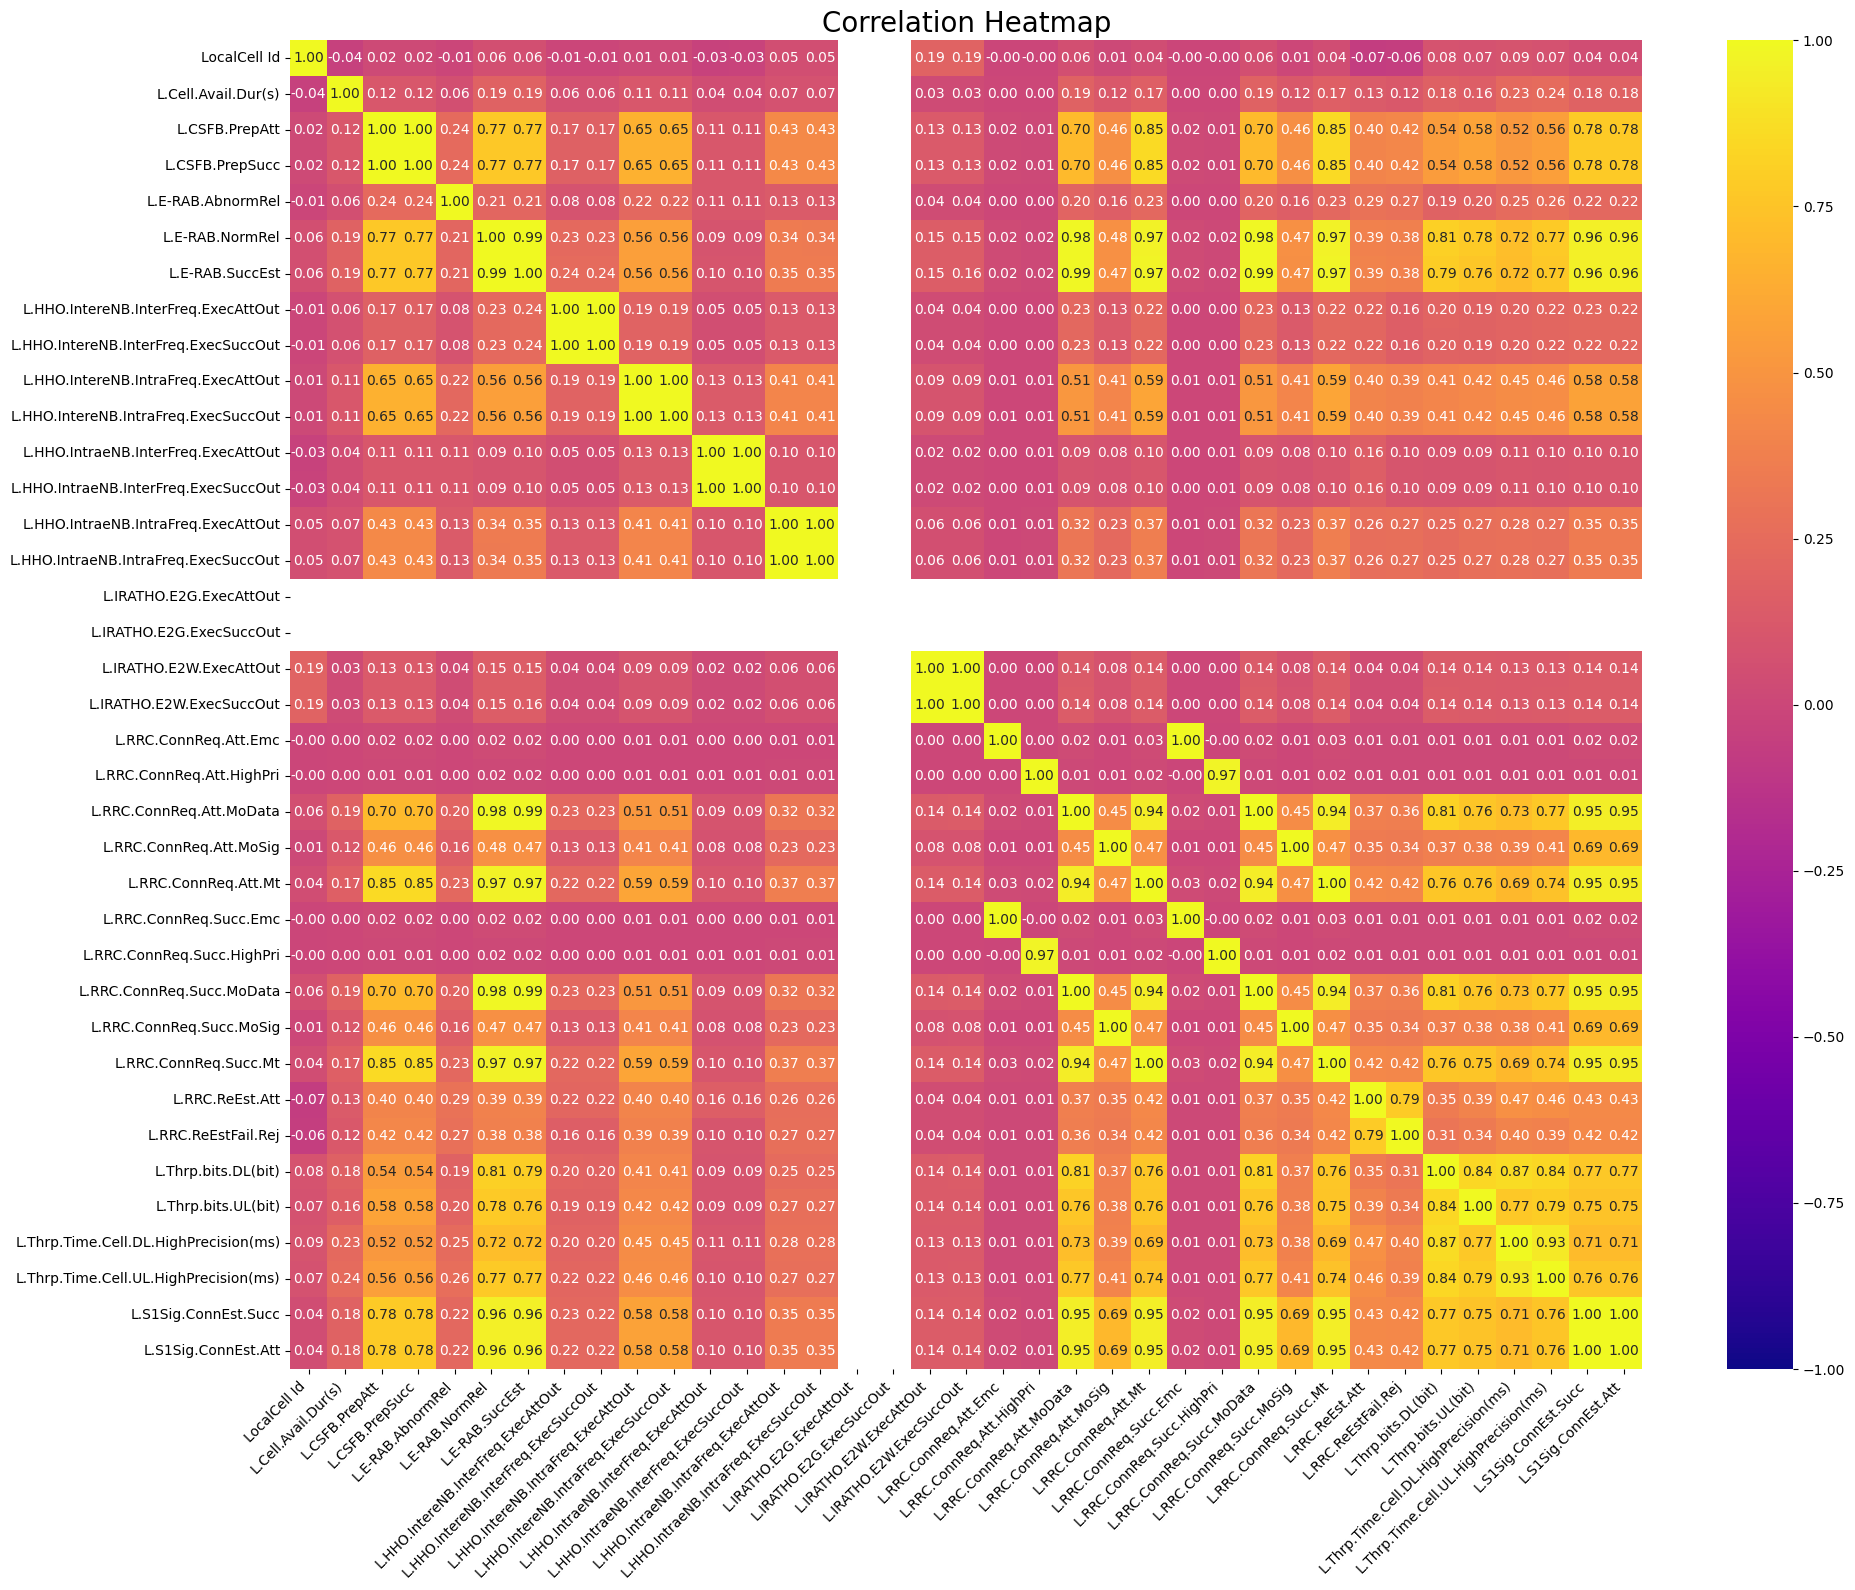

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 16))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='plasma',vmin=-1,vmax=1,fmt=".2f",square=False) 
plt.title("Correlation Heatmap", fontsize=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout() 
plt.show()

In [8]:
# Convert all numeric columns to float
for col in df.columns:
    if col not in ['Time', 'eNodeB Name', 'Cell Name', 'eNodeB Function Name', 'Cell FDD TDD Indication']:
        df[col] = pd.to_numeric(df[col], errors='coerce')

In [9]:
from sklearn.preprocessing import MinMaxScaler

df = df.dropna(subset=features_cols + ["Cell Name", "Time"])
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

scaler_x.fit(df[features_cols])
scaler_y.fit(df[[target_col]])

MinMaxScaler()

In [10]:
cell_names = df["Cell Name"].unique().tolist()
cell_to_id = {name: idx for idx, name in enumerate(cell_names)}

In [11]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [12]:
print(df.columns)

Index(['Time', 'eNodeB Name', 'Cell FDD TDD Indication', 'Cell Name',
       'LocalCell Id', 'eNodeB Function Name', 'Integrity',
       'L.Cell.Avail.Dur(s)', 'L.CSFB.PrepAtt', 'L.CSFB.PrepSucc',
       'L.E-RAB.AbnormRel', 'L.E-RAB.AttEst', 'L.E-RAB.NormRel',
       'L.E-RAB.SuccEst', 'L.HHO.IntereNB.InterFreq.ExecAttOut',
       'L.HHO.IntereNB.InterFreq.ExecSuccOut',
       'L.HHO.IntereNB.IntraFreq.ExecAttOut',
       'L.HHO.IntereNB.IntraFreq.ExecSuccOut',
       'L.HHO.IntraeNB.InterFreq.ExecAttOut',
       'L.HHO.IntraeNB.InterFreq.ExecSuccOut',
       'L.HHO.IntraeNB.IntraFreq.ExecAttOut',
       'L.HHO.IntraeNB.IntraFreq.ExecSuccOut', 'L.IRATHO.E2G.ExecAttOut',
       'L.IRATHO.E2G.ExecSuccOut', 'L.IRATHO.E2W.ExecAttOut',
       'L.IRATHO.E2W.ExecSuccOut', 'L.RRC.ConnReq.Att.Emc',
       'L.RRC.ConnReq.Att.HighPri', 'L.RRC.ConnReq.Att.MoData',
       'L.RRC.ConnReq.Att.MoSig', 'L.RRC.ConnReq.Att.Mt',
       'L.RRC.ConnReq.Succ.Emc', 'L.RRC.ConnReq.Succ.HighPri',
       'L.RRC

In [13]:
df_test = df[df["Cell Name"] =="NGOROM_s_e4"]
print(len(df_test[df_test["Time"] == "2025-06-01 00:00:00"]))

44


In [ ]:
%%time
seq_len = 50
all_seq = []
df["Time"] = pd.to_datetime(df["Time"])
unique_times = sorted(df["Time"].dropna().unique())
time_to_id = {t: i for i, t in enumerate(unique_times)}

In [15]:
print(df["Time"].info())

<class 'pandas.core.series.Series'>
Index: 5344734 entries, 0 to 5344801
Series name: Time
Non-Null Count    Dtype         
--------------    -----         
5344734 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 81.6 MB
None


In [16]:
print(len(cell_names))

3000


In [ ]:
print(cell_names)

In [18]:
import numpy as np

In [19]:
all_seq = []
for cell in cell_names[:1000]:
    cell_df = df[df["Cell Name"] == cell]
    cell_df = cell_df[["Time"] + features_cols].dropna()
    features = scaler_x.transform(cell_df[features_cols].values)
    target   = scaler_y.transform(cell_df[[target_col]]).flatten()
    dates = pd.to_datetime(cell_df["Time"].values)  # convert to pd.Timestamp

    for i in range(len(features) - seq_len):
        x = features[i:i+seq_len]
        y = target[i + seq_len]
        time_ids = [time_to_id[date] for date in dates[i:i+ seq_len]]
        cell_id = cell_to_id[cell]
        time_ids = np.array(time_ids).reshape(-1, 1)
        x_with_time = np.concatenate([x, time_ids], axis=1)
        all_seq.append((x_with_time,cell_id,y))

In [20]:
print(len(all_seq))

1720964


In [22]:
import numpy as np
cutoff_cell = np.percentile([s[1] for s in all_seq], 80)  # 80% split

train_seq = [s for s in all_seq if s[1] <= cutoff_cell]
test_seq  = [s for s in all_seq if s[1] >  cutoff_cell]

print(f"Train sequences: {len(train_seq)}")
print(f"Test sequences:  {len(test_seq)}")

Train sequences: 1378485
Test sequences:  342479


In [23]:
import torch
from torch.utils.data import Dataset, DataLoader

class KPIGPTDataset(Dataset):
    def __init__(self, seq_tuples, dtype=torch.float32):
        self.seq_tuples = seq_tuples
        self.dtype = dtype
    
    def __len__(self):
        return len(self.seq_tuples)
    
    def __getitem__(self, idx):
        x, cell_id, y = self.seq_tuples[idx]
        x = torch.tensor(x, dtype=self.dtype)             # (T, F)
        cell_id = torch.tensor(cell_id, dtype=torch.long) # categorical
        y = torch.tensor(y, dtype=self.dtype)             # scalar
        
        return x, cell_id, y


In [38]:
train_dataset = KPIGPTDataset(train_seq)
test_dataset  = KPIGPTDataset(test_seq)
train_loader  = DataLoader(train_dataset, batch_size=300, shuffle=True, drop_last=True)
test_loader   = DataLoader(train_dataset, batch_size=300, shuffle=False, drop_last=True)

In [25]:
print(f"Features :\n{train_dataset[5000][0]}")
print(f"Cell ID      : {train_dataset[5000][1]}")
print(f"Target Value : {train_dataset[5000][2]}")

Features :
tensor([[1.0749e-01, 4.5485e-02, 4.5529e-02, 3.8033e-02, 3.7970e-02, 1.9800e-02,
         1.3300e+02],
        [1.0749e-01, 4.5485e-02, 4.5529e-02, 3.8033e-02, 3.7970e-02, 1.9800e-02,
         1.3300e+02],
        [1.0749e-01, 4.5485e-02, 4.5529e-02, 3.8033e-02, 3.7970e-02, 1.9800e-02,
         1.3300e+02],
        [6.6772e-02, 4.2451e-02, 4.2484e-02, 3.3344e-02, 3.3345e-02, 2.7033e-02,
         1.3400e+02],
        [6.6772e-02, 4.2451e-02, 4.2484e-02, 3.3344e-02, 3.3345e-02, 2.7033e-02,
         1.3400e+02],
        [6.6772e-02, 4.2451e-02, 4.2484e-02, 3.3344e-02, 3.3345e-02, 2.7033e-02,
         1.3400e+02],
        [6.6772e-02, 4.2451e-02, 4.2484e-02, 3.3344e-02, 3.3345e-02, 2.7033e-02,
         1.3400e+02],
        [6.6772e-02, 4.2451e-02, 4.2484e-02, 3.3344e-02, 3.3345e-02, 2.7033e-02,
         1.3400e+02],
        [6.6772e-02, 4.2451e-02, 4.2484e-02, 3.3344e-02, 3.3345e-02, 2.7033e-02,
         1.3400e+02],
        [6.6772e-02, 4.2451e-02, 4.2484e-02, 3.3344e-02, 3.334

In [27]:
import torch 
import torch.nn as nn

In [28]:
class MultiHeadAttention(nn.Module) : 
    def __init__(self,d_in,d_out,context_length,dropout,num_heads,bias=False):
        super().__init__()
        assert(d_out % num_heads ==0 ) ,"d_out must be divisible by num_heads"
        
        self.d_out = d_out
        self.num_heads = num_heads
        
        self.head_dim = d_out // num_heads
        
        self.w_q = nn.Linear(d_in,d_out,bias=bias)
        self.w_k = nn.Linear(d_in,d_out,bias=bias)
        self.w_v = nn.Linear(d_in,d_out,bias=bias)
        self.out_proj = nn.Linear(d_out,d_out)
        self.dropout  = nn.Dropout(dropout) 
        self.register_buffer(
            'mask',
            torch.triu(torch.ones(context_length,context_length),diagonal=1)
        )
    
    def forward(self,x):
        b,num_tokens,d_embed= x.shape
        
        queries = self.w_q(x) ## (b , num_tokens , d_out)
        #print(f"queries :\n {queries}")
        keys    = self.w_k(x) ## (b , num_tokens , d_out)
        #print(f"keys    : \n {keys}")
        values  = self.w_v(x) ## (b , num_tokens , d_out)
        #print(f"values  : \n {values}")
        ## (b , num_tokens , d_out) -------->  (b , num_tokens , num_heads , head_dim)
        queries = queries.view(b,num_tokens,self.num_heads,self.head_dim)
        keys    = keys.view(b,num_tokens,self.num_heads,self.head_dim)
        values  = values.view(b,num_tokens,self.num_heads,self.head_dim)
        #print(f"queries after view :\n {queries}")
        #print(f"keys after view    :\n {keys}")
        #print(f"values after view  :\n {values}")
        # (b , num_tokens , num_heads , head_dim) ------> (b , num_heads , num_tokens , head_dim)
        ## in this case each head should be able to access all the tokens but with different embeddings (keys values splitted over the different heads)
        keys    = keys.transpose(1,2) 
        queries = queries.transpose(1,2) 
        values  = values.transpose(1,2) 
        #print(f"queries after transpose :\n {queries}")
        #print(f"keys after transpose    :\n {keys}")
        #print(f"values after transpose  :\n {values}")
        attn_scores = queries @ keys.transpose(-1,-2)
        #print(f"Attention Scores : \n {attn_scores}")
        mask_bool = self.mask.bool()[:num_tokens,:num_tokens]
        attn_scores_masked = attn_scores.masked_fill_(mask_bool,-torch.inf)
        #print(f"Attention Scores masked : \n {attn_scores_masked}")
        attn_weights = F.softmax(attn_scores_masked / keys.shape[-1]**0.5,dim=-1)
        #print(f"Attention Weights : \n {attn_weights}")
        attn_weights = self.dropout(attn_weights)
        
        context = ( attn_weights @ values ).transpose(1,2)# (b , num_heads , num_tokens , head_dim) ------> (b , num_tokens , num_heads , head_dim) 
        
        context = context.contiguous().view(b,num_tokens,self.d_out)
        
        context = self.out_proj(context) # optional linear projection layer 
        
        return context

class TransformerBlock(nn.Module):
    def __init__(self,cfg):
        super().__init__()
        self.MHattention = MultiHeadAttention(
            d_in=cfg["emb_dim"],
            d_out=cfg["emb_dim"],
            context_length=cfg["context_length"],
            num_heads=cfg["n_heads"],
            dropout=cfg["drop_rate"],
            bias=cfg["qkv_bias"]
        )
        self.layer_norm_1 = LayerNorm(emb_dim=cfg['emb_dim'])
        self.layer_norm_2 = LayerNorm(emb_dim=cfg['emb_dim'])
        self.ffn          = FeedForward(cfg)
        self.dropout      = nn.Dropout(cfg["drop_rate"])
        
        
    def forward(self,x) : 
        res_1 = x 
        x = self.layer_norm_1(x)
        x = self.MHattention(x)
        x = self.dropout(x)
        x = x + res_1
        
        res_2 = x 
        
        x = self.layer_norm_2(x)
        x = self.ffn(x)
        x = self.dropout(x)
        x = x + res_2
        
        return x 

## building the layer normalization class 
class LayerNorm(nn.Module):
    def __init__(self,emb_dim):
        super().__init__()
        self.eps = 1e-5 ## since we are dividing by the square root of the variance , we use eps to prevent division by zero 
        self.scale = nn.Parameter(torch.ones(emb_dim))
        self.shift = nn.Parameter(torch.zeros(emb_dim))
        ## scale and shift are learned parameters that the model can update if this can enhance the training
    def forward(self,x):
        mean = x.mean(dim=-1,keepdim=True)
        var = x.var(dim=-1,keepdim=True,unbiased=False)
        norm_x = (x - mean) / torch.sqrt(var + self.eps)
        return self.scale * norm_x + self.shift
        
class FeedForward(nn.Module): 
    def __init__(self,cfg) : 
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(cfg["emb_dim"] , 4*cfg["emb_dim"]),
            GELU(),
            nn.Linear(4*cfg["emb_dim"] , cfg["emb_dim"])
        )
    def forward(self,x):
        return self.layers(x)
    

class GELU(nn.Module):
    def __init__(self):
        super().__init__()
    
    def forward(self,x):
        return 0.5*x*(1 + torch.tanh(torch.sqrt(torch.tensor(2.0/torch.pi))*(x+0.044715*torch.pow(x,3))))


In [ ]:
### building the GPT like model : 

class KPIGPTModel(nn.Module) : 
    def __init__(self,cfg) : 
        super().__init__()
        self.emb_dim = cfg["emb_dim"]
        self.context_length = cfg["context_length"]
        
        ## projection layer ==> (n_features) --> (n_features , emb_dim) (input embedding)
        self.features_proj = nn.Linear(cfg["n_features"] , self.emb_dim)
        
        ## categorical features embeddings 
        #self.site_emb = nn.Embedding(cfg["n_sites"] , self.emb_dim)
        self.cell_emb = nn.Embedding(cfg["n_cells"] , self.emb_dim)
        
        ## position embedding : 
        self.pos_emb = nn.Embedding(self.context_length , self.emb_dim)
        
        self.drop_emb = nn.Dropout(cfg["drop_rate"])
        
        
        self.trf_blocks = nn.Sequential(
            *[TransformerBlock(cfg) for _ in range(cfg["n_layers"])]
        )
        
        self.final_norm = LayerNorm(self.emb_dim)
        
        ## Regression 
        self.out_head = nn.Linear(self.emb_dim,1,bias=True)
        
    def forward(self,x_feat ,cell_id) : 
        """
        x_feat: (B, T, F) scaled features history 
        cell_id: (B,) categorical cell indices 
        """
        B,T,F  = x_feat.shape
        assert T <= self.context_length  , "Sequence longer than context length"
        
        x = self.features_proj(x_feat) ## (B,T,emb_dim)
        #site_e = self.site_emb(site_id)[:,None,:] # (B,1,E)        
        cell_e = self.cell_emb(cell_id)[:,None,:] # (B,1,E)     
        x = x + cell_e 
        ## Positional Encoding
        pos_idx = torch.arange(T,device=x.device)
        pos_e = self.pos_emb(pos_idx)[None,:,:] # (1,T,E)
        x = x+pos_e
        
        x = self.drop_emb(x)
        x = self.trf_blocks(x)
        x = self.final_norm(x)
        last_h = x[:,-1,:] # (B,E)
        pred_next = self.out_head(last_h) # (B,1)
        return pred_next.squeeze(-1) ## (B,)
        

In [30]:
import os
os.environ["CUDA_LAUNCH_BLOCKING"] = "1"

In [31]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [32]:
from tqdm import tqdm

In [39]:
import torch.nn.functional as F

cfg = {
    "emb_dim": 256,
    "context_length": seq_len,
    "n_heads": 8,
    "n_layers": 6,
    "drop_rate": 0.1,
    "qkv_bias": False,
    "n_features": 7,
    #"n_sites": 515,
    "n_cells": 1000,
}

model = KPIGPTModel(cfg) 
optimizer = torch.optim.AdamW(model.parameters() , lr=0.00005,weight_decay=0.01)

num_epochs = 10
model = model.to(device)

for epoch in range(num_epochs) : 
    model.train()
    total_train , n= 0.0 ,0 
    data_iterator = tqdm(train_loader,desc=f"Epoch : {epoch+1}")
    for x_feat , cell_id , y_target in data_iterator : 
         x_feat ,  cell_id , y_target = x_feat.to(device) ,  cell_id.to(device) , y_target.to(device)
         optimizer.zero_grad()
         n+=1
         y_hat = model(x_feat , cell_id)
         loss = F.mse_loss(y_hat,y_target)
         data_iterator.set_postfix(loss=loss.item())
         loss.backward()
         optimizer.step()
         
         total_train += loss.item() * x_feat.size(0)
    train_loss = total_train / n if n > 0 else float("nan")
    
    model.eval()
    total_val , n= 0.0 ,0
    for x_feat , cell_id , y_target in test_loader : 
         x_feat , cell_id , y_target = x_feat.to(device) , cell_id.to(device) , y_target.to(device)
         y_hat = model(x_feat ,  cell_id)
         loss = F.mse_loss(y_hat,y_target)
         n+=1
         total_val += loss.item() * x_feat.size(0)
    val_loss = total_val / n if n > 0 else float("nan")
    
    print(f"Epoch {epoch+1} | Train MSE : {train_loss:.3f} -- Validation MSE : {val_loss:.3f}")

Epoch : 1: 100%|██████████| 4594/4594 [14:34<00:00,  5.25it/s, loss=0.000819]


Epoch 1 | Train MSE : 0.933 -- Validation MSE : 0.264


Epoch : 2: 100%|██████████| 4594/4594 [14:34<00:00,  5.26it/s, loss=0.000404]


Epoch 2 | Train MSE : 0.222 -- Validation MSE : 0.136


Epoch : 3: 100%|██████████| 4594/4594 [14:36<00:00,  5.24it/s, loss=0.000251]


Epoch 3 | Train MSE : 0.133 -- Validation MSE : 0.100


Epoch : 4: 100%|██████████| 4594/4594 [14:19<00:00,  5.34it/s, loss=0.000307]


Epoch 4 | Train MSE : 0.105 -- Validation MSE : 0.081


Epoch : 5: 100%|██████████| 4594/4594 [14:20<00:00,  5.34it/s, loss=0.000281]


Epoch 5 | Train MSE : 0.090 -- Validation MSE : 0.079


Epoch : 6: 100%|██████████| 4594/4594 [14:19<00:00,  5.34it/s, loss=0.000206]


Epoch 6 | Train MSE : 0.080 -- Validation MSE : 0.085


Epoch : 7: 100%|██████████| 4594/4594 [14:22<00:00,  5.33it/s, loss=0.000158]


Epoch 7 | Train MSE : 0.072 -- Validation MSE : 0.084


Epoch : 8: 100%|██████████| 4594/4594 [14:30<00:00,  5.27it/s, loss=0.000142]


Epoch 8 | Train MSE : 0.065 -- Validation MSE : 0.075


Epoch : 9: 100%|██████████| 4594/4594 [14:30<00:00,  5.27it/s, loss=0.000255]


Epoch 9 | Train MSE : 0.059 -- Validation MSE : 0.063


Epoch : 10: 100%|██████████| 4594/4594 [14:24<00:00,  5.32it/s, loss=0.000156]


Epoch 10 | Train MSE : 0.054 -- Validation MSE : 0.058


In [46]:
torch.save(model.state_dict(), 'model_weights.pth')

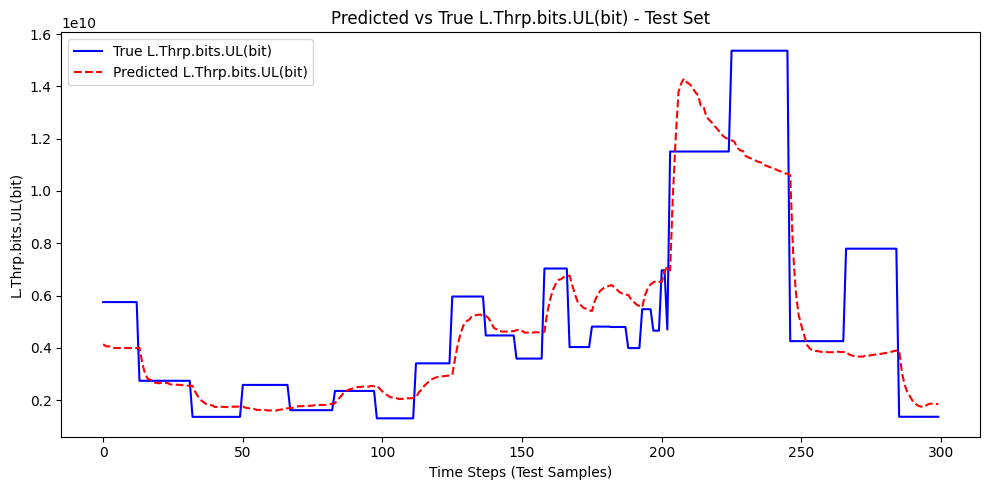

In [40]:
model.eval()
import matplotlib.pyplot as plt
import numpy as np

all_preds, all_true = [], []

with torch.no_grad():
    for x_feat,  cell_id, y in test_loader:
        x_feat  = x_feat.to(device)
        cell_id = cell_id.to(device)
        y = y.to(device)

        y_hat = model(x_feat, cell_id)  # Shape [batch_size, 1] or [batch_size]
        all_preds.append(y_hat.cpu().numpy())
        all_true.append(y.cpu().numpy())

# Concatenate all batches
all_preds = np.concatenate(all_preds).reshape(-1, 1)
all_true  = np.concatenate(all_true).reshape(-1, 1)

# Inverse transform (to original CDR values)
all_preds = scaler_y.inverse_transform(all_preds)
all_true  = scaler_y.inverse_transform(all_true)

# --- Plot ---
plt.figure(figsize=(10, 5))
plt.plot(all_true[:300], label="True L.Thrp.bits.UL(bit)", color='blue')
plt.plot(all_preds[:300], label="Predicted L.Thrp.bits.UL(bit)", color='red', linestyle='--')
plt.title("Predicted vs True L.Thrp.bits.UL(bit) - Test Set")
plt.xlabel("Time Steps (Test Samples)")
plt.ylabel("L.Thrp.bits.UL(bit)")
plt.legend()
plt.tight_layout()
plt.show()

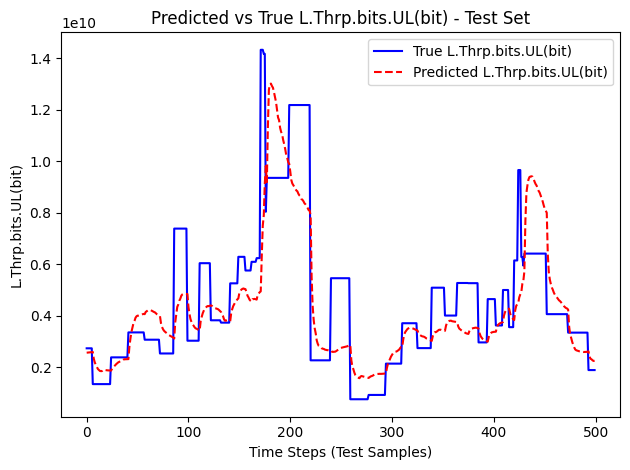

In [45]:
plt.plot(all_true[2000:2500], label="True L.Thrp.bits.UL(bit)", color='blue')
plt.plot(all_preds[2000:2500], label="Predicted L.Thrp.bits.UL(bit)", color='red', linestyle='--')
plt.title("Predicted vs True L.Thrp.bits.UL(bit) - Test Set")
plt.xlabel("Time Steps (Test Samples)")
plt.ylabel("L.Thrp.bits.UL(bit)")
plt.legend()
plt.tight_layout()
plt.show()

In [47]:
for epoch in range(num_epochs) : 
    model.train()
    total_train , n= 0.0 ,0 
    data_iterator = tqdm(train_loader,desc=f"Epoch : {epoch+1}")
    for x_feat , cell_id , y_target in data_iterator : 
         x_feat ,  cell_id , y_target = x_feat.to(device) ,  cell_id.to(device) , y_target.to(device)
         optimizer.zero_grad()
         n+=1
         y_hat = model(x_feat , cell_id)
         loss = F.mse_loss(y_hat,y_target)
         data_iterator.set_postfix(loss=loss.item())
         loss.backward()
         optimizer.step()
         
         total_train += loss.item() * x_feat.size(0)
    train_loss = total_train / n if n > 0 else float("nan")
    
    model.eval()
    total_val , n= 0.0 ,0
    for x_feat , cell_id , y_target in test_loader : 
         x_feat , cell_id , y_target = x_feat.to(device) , cell_id.to(device) , y_target.to(device)
         y_hat = model(x_feat ,  cell_id)
         loss = F.mse_loss(y_hat,y_target)
         n+=1
         total_val += loss.item() * x_feat.size(0)
    val_loss = total_val / n if n > 0 else float("nan")
    
    print(f"Epoch {epoch+11} | Train MSE : {train_loss:.3f} -- Validation MSE : {val_loss:.3f}")

Epoch : 1: 100%|██████████| 4594/4594 [14:10<00:00,  5.40it/s, loss=0.000144]


Epoch 11 | Train MSE : 0.049 -- Validation MSE : 0.058


Epoch : 2: 100%|██████████| 4594/4594 [14:14<00:00,  5.38it/s, loss=0.000117]


Epoch 12 | Train MSE : 0.046 -- Validation MSE : 0.042


Epoch : 3: 100%|██████████| 4594/4594 [14:16<00:00,  5.36it/s, loss=0.000115]


Epoch 13 | Train MSE : 0.042 -- Validation MSE : 0.042


Epoch : 4: 100%|██████████| 4594/4594 [14:15<00:00,  5.37it/s, loss=0.000133]


Epoch 14 | Train MSE : 0.039 -- Validation MSE : 0.039


Epoch : 5: 100%|██████████| 4594/4594 [14:21<00:00,  5.33it/s, loss=9.38e-5] 


Epoch 15 | Train MSE : 0.036 -- Validation MSE : 0.037


Epoch : 6: 100%|██████████| 4594/4594 [14:16<00:00,  5.36it/s, loss=0.000149]


Epoch 16 | Train MSE : 0.034 -- Validation MSE : 0.028


Epoch : 7: 100%|██████████| 4594/4594 [14:13<00:00,  5.38it/s, loss=8.46e-5] 


Epoch 17 | Train MSE : 0.032 -- Validation MSE : 0.027


Epoch : 8: 100%|██████████| 4594/4594 [14:16<00:00,  5.36it/s, loss=6.55e-5] 


Epoch 18 | Train MSE : 0.030 -- Validation MSE : 0.030


Epoch : 9: 100%|██████████| 4594/4594 [14:11<00:00,  5.40it/s, loss=6.95e-5] 


Epoch 19 | Train MSE : 0.029 -- Validation MSE : 0.031


Epoch : 10: 100%|██████████| 4594/4594 [14:15<00:00,  5.37it/s, loss=5.8e-5]  


Epoch 20 | Train MSE : 0.027 -- Validation MSE : 0.027


In [51]:
torch.save(model.state_dict(), 'model_weights_20.pth')

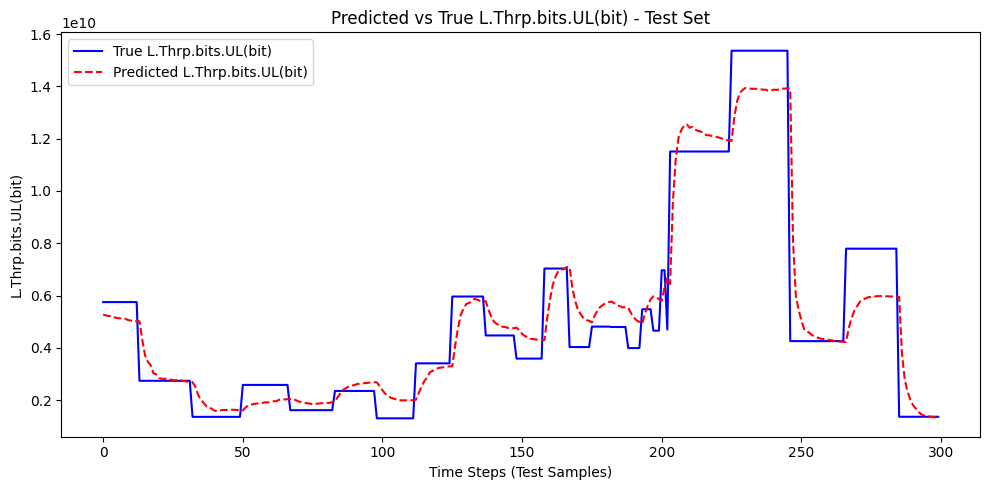

In [52]:
model.eval()
import matplotlib.pyplot as plt
import numpy as np

all_preds, all_true = [], []

with torch.no_grad():
    for x_feat,  cell_id, y in test_loader:
        x_feat  = x_feat.to(device)
        cell_id = cell_id.to(device)
        y = y.to(device)

        y_hat = model(x_feat, cell_id)  # Shape [batch_size, 1] or [batch_size]
        all_preds.append(y_hat.cpu().numpy())
        all_true.append(y.cpu().numpy())

# Concatenate all batches
all_preds = np.concatenate(all_preds).reshape(-1, 1)
all_true  = np.concatenate(all_true).reshape(-1, 1)

# Inverse transform (to original CDR values)
all_preds = scaler_y.inverse_transform(all_preds)
all_true  = scaler_y.inverse_transform(all_true)

# --- Plot ---
plt.figure(figsize=(10, 5))
plt.plot(all_true[:300], label="True L.Thrp.bits.UL(bit)", color='blue')
plt.plot(all_preds[:300], label="Predicted L.Thrp.bits.UL(bit)", color='red', linestyle='--')
plt.title("Predicted vs True L.Thrp.bits.UL(bit) - Test Set")
plt.xlabel("Time Steps (Test Samples)")
plt.ylabel("L.Thrp.bits.UL(bit)")
plt.legend()
plt.tight_layout()
plt.show()

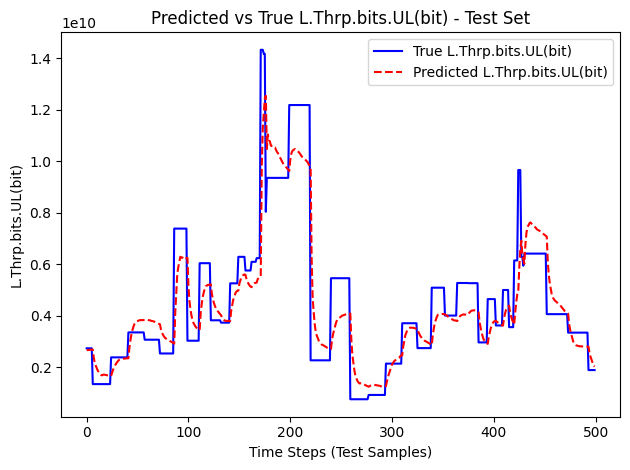

In [53]:
plt.plot(all_true[2000:2500], label="True L.Thrp.bits.UL(bit)", color='blue')
plt.plot(all_preds[2000:2500], label="Predicted L.Thrp.bits.UL(bit)", color='red', linestyle='--')
plt.title("Predicted vs True L.Thrp.bits.UL(bit) - Test Set")
plt.xlabel("Time Steps (Test Samples)")
plt.ylabel("L.Thrp.bits.UL(bit)")
plt.legend()
plt.tight_layout()
plt.show()

In [54]:
num_epochs = 4 
for epoch in range(num_epochs) : 
    model.train()
    total_train , n= 0.0 ,0 
    data_iterator = tqdm(train_loader,desc=f"Epoch {epoch+21}")
    for x_feat , cell_id , y_target in data_iterator : 
         x_feat ,  cell_id , y_target = x_feat.to(device) ,  cell_id.to(device) , y_target.to(device)
         optimizer.zero_grad()
         n+=1
         y_hat = model(x_feat , cell_id)
         loss = F.mse_loss(y_hat,y_target)
         data_iterator.set_postfix(loss=loss.item())
         loss.backward()
         optimizer.step()
         
         total_train += loss.item() * x_feat.size(0)
    train_loss = total_train / n if n > 0 else float("nan")
    
    model.eval()
    total_val , n= 0.0 ,0
    for x_feat , cell_id , y_target in test_loader : 
         x_feat , cell_id , y_target = x_feat.to(device) , cell_id.to(device) , y_target.to(device)
         y_hat = model(x_feat ,  cell_id)
         loss = F.mse_loss(y_hat,y_target)
         n+=1
         total_val += loss.item() * x_feat.size(0)
    val_loss = total_val / n if n > 0 else float("nan")
    
    print(f"Epoch {epoch+21} | Train MSE : {train_loss:.3f} -- Validation MSE : {val_loss:.3f}")

Epoch 21: 100%|██████████| 4594/4594 [14:15<00:00,  5.37it/s, loss=5.81e-5] 


Epoch 21 | Train MSE : 0.026 -- Validation MSE : 0.027


Epoch 22: 100%|██████████| 4594/4594 [14:21<00:00,  5.33it/s, loss=6.78e-5] 


Epoch 22 | Train MSE : 0.026 -- Validation MSE : 0.021


Epoch 23: 100%|██████████| 4594/4594 [14:18<00:00,  5.35it/s, loss=9.01e-5] 


Epoch 23 | Train MSE : 0.025 -- Validation MSE : 0.034


Epoch 24: 100%|██████████| 4594/4594 [14:23<00:00,  5.32it/s, loss=9.48e-5] 


Epoch 24 | Train MSE : 0.024 -- Validation MSE : 0.023


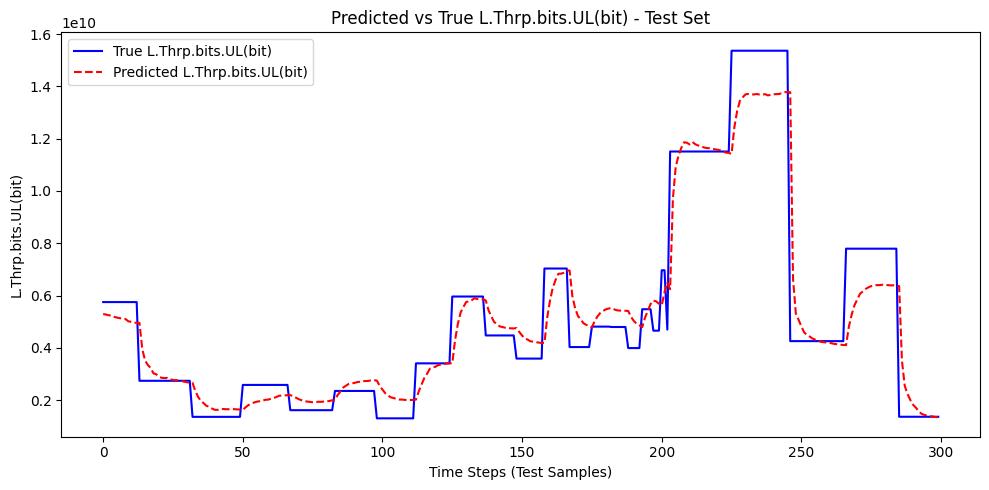

In [55]:
model.eval()
import matplotlib.pyplot as plt
import numpy as np

all_preds, all_true = [], []

with torch.no_grad():
    for x_feat,  cell_id, y in test_loader:
        x_feat  = x_feat.to(device)
        cell_id = cell_id.to(device)
        y = y.to(device)

        y_hat = model(x_feat, cell_id)  # Shape [batch_size, 1] or [batch_size]
        all_preds.append(y_hat.cpu().numpy())
        all_true.append(y.cpu().numpy())

# Concatenate all batches
all_preds = np.concatenate(all_preds).reshape(-1, 1)
all_true  = np.concatenate(all_true).reshape(-1, 1)

# Inverse transform (to original CDR values)
all_preds = scaler_y.inverse_transform(all_preds)
all_true  = scaler_y.inverse_transform(all_true)

# --- Plot ---
plt.figure(figsize=(10, 5))
plt.plot(all_true[:300], label="True L.Thrp.bits.UL(bit)", color='blue')
plt.plot(all_preds[:300], label="Predicted L.Thrp.bits.UL(bit)", color='red', linestyle='--')
plt.title("Predicted vs True L.Thrp.bits.UL(bit) - Test Set")
plt.xlabel("Time Steps (Test Samples)")
plt.ylabel("L.Thrp.bits.UL(bit)")
plt.legend()
plt.tight_layout()
plt.show()

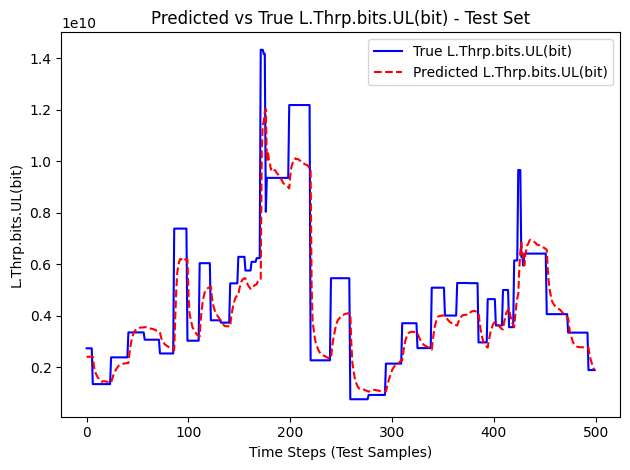

In [56]:
plt.plot(all_true[2000:2500], label="True L.Thrp.bits.UL(bit)", color='blue')
plt.plot(all_preds[2000:2500], label="Predicted L.Thrp.bits.UL(bit)", color='red', linestyle='--')
plt.title("Predicted vs True L.Thrp.bits.UL(bit) - Test Set")
plt.xlabel("Time Steps (Test Samples)")
plt.ylabel("L.Thrp.bits.UL(bit)")
plt.legend()
plt.tight_layout()
plt.show()

In [57]:
num_epochs = 6 
for epoch in range(num_epochs) : 
    model.train()
    total_train , n= 0.0 ,0 
    data_iterator = tqdm(train_loader,desc=f"Epoch {epoch+25}")
    for x_feat , cell_id , y_target in data_iterator : 
         x_feat ,  cell_id , y_target = x_feat.to(device) ,  cell_id.to(device) , y_target.to(device)
         optimizer.zero_grad()
         n+=1
         y_hat = model(x_feat , cell_id)
         loss = F.mse_loss(y_hat,y_target)
         data_iterator.set_postfix(loss=loss.item())
         loss.backward()
         optimizer.step()
         
         total_train += loss.item() * x_feat.size(0)
    train_loss = total_train / n if n > 0 else float("nan")
    
    model.eval()
    total_val , n= 0.0 ,0
    for x_feat , cell_id , y_target in test_loader : 
         x_feat , cell_id , y_target = x_feat.to(device) , cell_id.to(device) , y_target.to(device)
         y_hat = model(x_feat ,  cell_id)
         loss = F.mse_loss(y_hat,y_target)
         n+=1
         total_val += loss.item() * x_feat.size(0)
    val_loss = total_val / n if n > 0 else float("nan")
    
    print(f"Epoch {epoch+25} | Train MSE : {train_loss:.3f} -- Validation MSE : {val_loss:.3f}")

Epoch 25: 100%|██████████| 4594/4594 [14:20<00:00,  5.34it/s, loss=6.94e-5] 


Epoch 25 | Train MSE : 0.023 -- Validation MSE : 0.024


Epoch 26: 100%|██████████| 4594/4594 [14:17<00:00,  5.36it/s, loss=4.5e-5]  


Epoch 26 | Train MSE : 0.023 -- Validation MSE : 0.021


Epoch 27: 100%|██████████| 4594/4594 [14:33<00:00,  5.26it/s, loss=7.15e-5] 


Epoch 27 | Train MSE : 0.022 -- Validation MSE : 0.022


Epoch 28: 100%|██████████| 4594/4594 [14:30<00:00,  5.28it/s, loss=0.000133]


Epoch 28 | Train MSE : 0.021 -- Validation MSE : 0.016


Epoch 29: 100%|██████████| 4594/4594 [14:31<00:00,  5.27it/s, loss=7.62e-5] 


Epoch 29 | Train MSE : 0.021 -- Validation MSE : 0.024


Epoch 30: 100%|██████████| 4594/4594 [14:34<00:00,  5.25it/s, loss=4.17e-5] 


Epoch 30 | Train MSE : 0.021 -- Validation MSE : 0.022


In [58]:
torch.save(model.state_dict(), 'model_weights_30.pth')

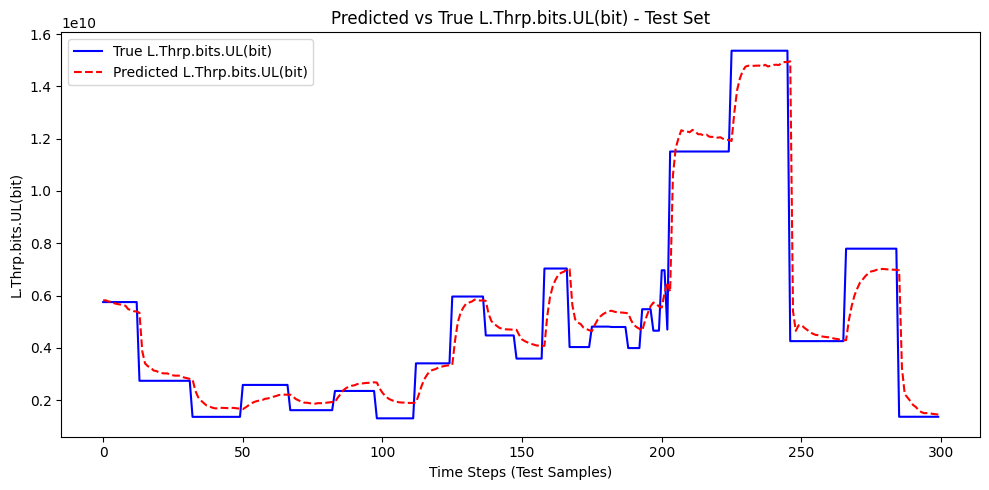

In [59]:
model.eval()
import matplotlib.pyplot as plt
import numpy as np

all_preds, all_true = [], []

with torch.no_grad():
    for x_feat,  cell_id, y in test_loader:
        x_feat  = x_feat.to(device)
        cell_id = cell_id.to(device)
        y = y.to(device)

        y_hat = model(x_feat, cell_id)  # Shape [batch_size, 1] or [batch_size]
        all_preds.append(y_hat.cpu().numpy())
        all_true.append(y.cpu().numpy())

# Concatenate all batches
all_preds = np.concatenate(all_preds).reshape(-1, 1)
all_true  = np.concatenate(all_true).reshape(-1, 1)

# Inverse transform (to original CDR values)
all_preds = scaler_y.inverse_transform(all_preds)
all_true  = scaler_y.inverse_transform(all_true)

# --- Plot ---
plt.figure(figsize=(10, 5))
plt.plot(all_true[:300], label="True L.Thrp.bits.UL(bit)", color='blue')
plt.plot(all_preds[:300], label="Predicted L.Thrp.bits.UL(bit)", color='red', linestyle='--')
plt.title("Predicted vs True L.Thrp.bits.UL(bit) - Test Set")
plt.xlabel("Time Steps (Test Samples)")
plt.ylabel("L.Thrp.bits.UL(bit)")
plt.legend()
plt.tight_layout()
plt.show()

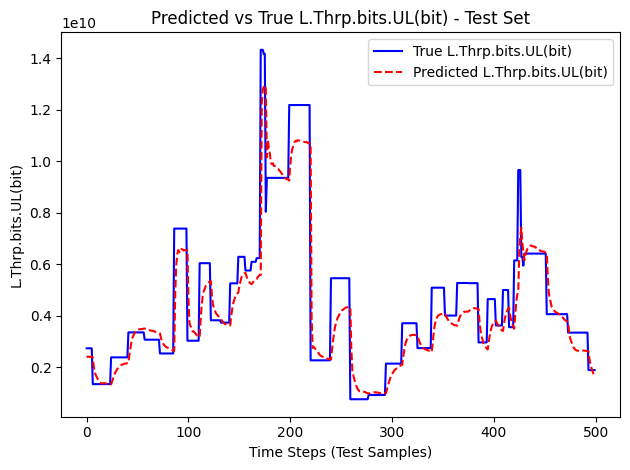

In [60]:
plt.plot(all_true[2000:2500], label="True L.Thrp.bits.UL(bit)", color='blue')
plt.plot(all_preds[2000:2500], label="Predicted L.Thrp.bits.UL(bit)", color='red', linestyle='--')
plt.title("Predicted vs True L.Thrp.bits.UL(bit) - Test Set")
plt.xlabel("Time Steps (Test Samples)")
plt.ylabel("L.Thrp.bits.UL(bit)")
plt.legend()
plt.tight_layout()
plt.show()